In [16]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/students-performance-in-exams/StudentsPerformance.csv


In [17]:
import pandas as pd

sf = pd.read_csv("/kaggle/input/students-performance-in-exams/StudentsPerformance.csv")

sf.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [18]:
sf.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [19]:
sf.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [20]:
sf['percentage'] = (sf['math score'] + sf['reading score'] + sf['writing score'])/3
sf.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,percentage
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667
1,female,group C,some college,standard,completed,69,90,88,82.333333
2,female,group B,master's degree,standard,none,90,95,93,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333
4,male,group C,some college,standard,none,76,78,75,76.333333


In [26]:
def calgrade(per):
    if per >= 95:
        return "A+"
    elif per >= 90:
        return "A"
    elif per >= 85:
        return "B+"
    elif per >= 80:
        return "B"
    elif per >= 75:
        return "C+"
    elif per >= 65:
        return "C"
    elif per >= 50:
        return "D"
    elif per >= 35:
        return "E"
    else: 
        return "F"

sf['Grade'] = sf.apply(lambda x : calgrade(x["percentage"]),axis=1)
sf.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,percentage,Grade
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667,C
1,female,group C,some college,standard,completed,69,90,88,82.333333,B
2,female,group B,master's degree,standard,none,90,95,93,92.666667,A
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333,E
4,male,group C,some college,standard,none,76,78,75,76.333333,C+


# GENDER DISTRIBUTION

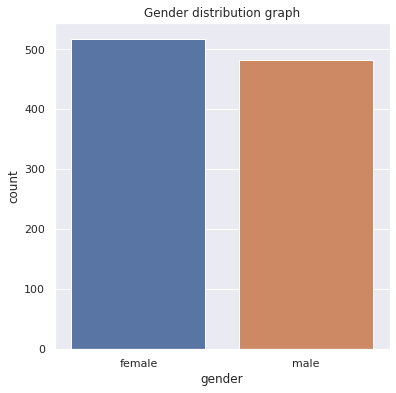

no of male students 482 no of female students 518


In [40]:
import matplotlib.pyplot as plt;
import seaborn as sns

sns.set_theme(style="darkgrid")
plt.figure(figsize=(6,6))

male=len(sf[sf['gender']=="male"])
female=len(sf[sf['gender']=="female"])

sns.countplot(data=sf,x='gender')
plt.title('Gender distribution graph')
plt.show()

print("no of male students " + str(male),"no of female students " + str(female))

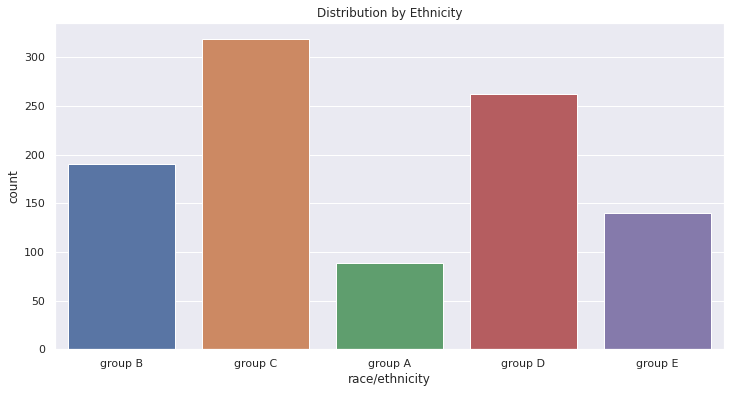

In [41]:
plt.figure(figsize=(12,6))
sns.countplot(data=sf,x='race/ethnicity')
plt.title("Distribution by Ethnicity")
plt.show()

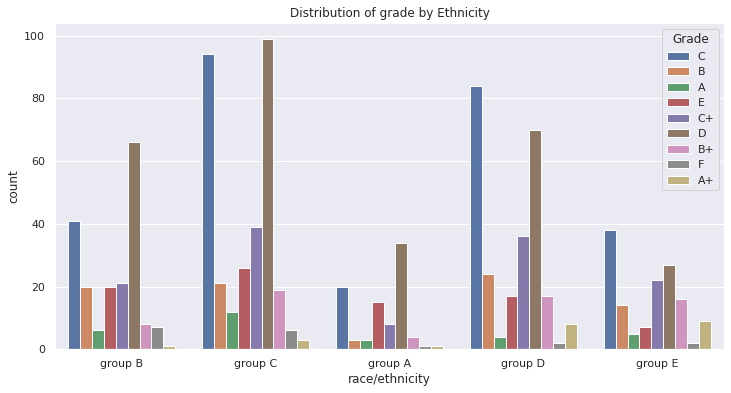

In [45]:
plt.figure(figsize=(12,6))
sns.countplot(data=sf,x='race/ethnicity',hue='Grade')
plt.title("Distribution of grade by Ethnicity")
plt.show()